In [79]:
import pandas as pd
import numpy as np

In [80]:
sales_df=pd.read_csv('Datasets/advertising.csv')

In [81]:
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [82]:
sales_df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [83]:
sales_df.shape

(200, 4)

EDA

In [84]:
sales_df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [85]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [86]:
sales_df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [87]:
sales_df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

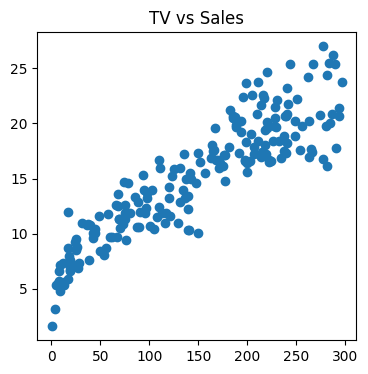

In [89]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.scatter(sales_df['TV'],sales_df['Sales'])
plt.title('TV vs Sales')
plt.show()

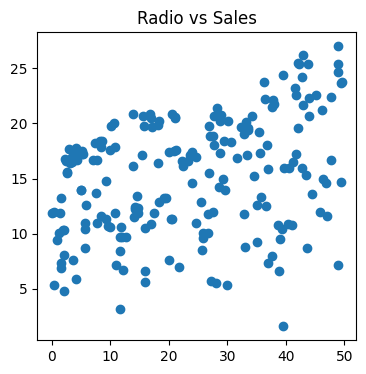

In [90]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.scatter(sales_df['Radio'],sales_df['Sales'])
plt.title('Radio vs Sales')
plt.show()

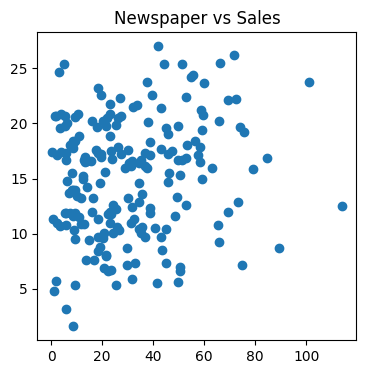

In [91]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
plt.scatter(sales_df['Newspaper'],sales_df['Sales'])
plt.title('Newspaper vs Sales')
plt.show()

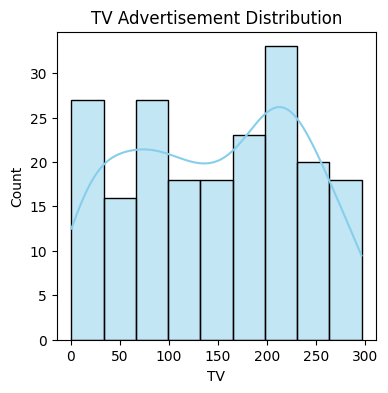

In [92]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(sales_df['TV'],kde=True,color='skyblue')
plt.title('TV Advertisement Distribution')
plt.show()

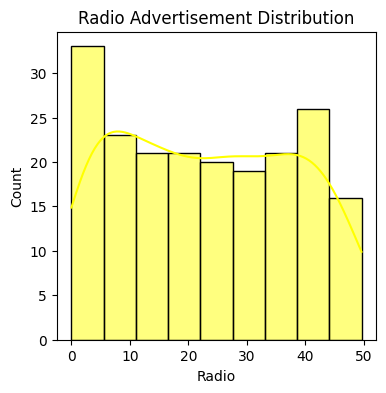

In [93]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(sales_df['Radio'],kde=True,color='yellow')
plt.title('Radio Advertisement Distribution')
plt.show()

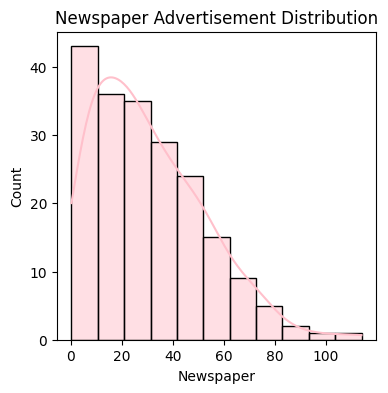

In [94]:
plt.figure(figsize=(14,4))
plt.subplot(1,3,1)
sns.histplot(sales_df['Newspaper'],kde=True,color='pink')
plt.title('Newspaper Advertisement Distribution')
plt.show()

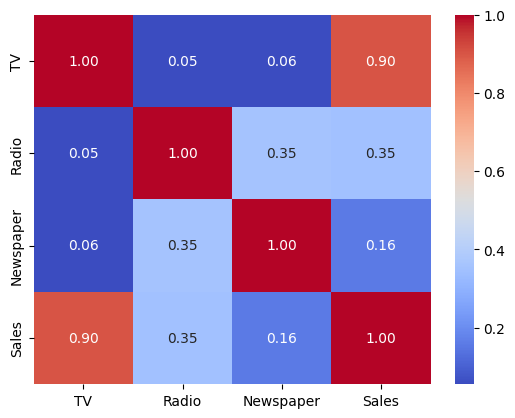

In [95]:
sales_corr_matrix=sales_df.corr()
sns.heatmap(sales_corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()

Model

In [96]:
sales_df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [97]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sales_df[['TV','Radio','Newspaper']]=scaler.fit_transform(sales_df[['TV','Radio','Newspaper']])

In [98]:
X=sales_df[['TV','Radio','Newspaper']]
y=sales_df['Sales']

In [99]:
X

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [100]:
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [102]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [103]:
model.fit(X_train,Y_train)

LinearRegression()

Evaluation of Training data and Testing data for LinearRegression

In [104]:
from sklearn.metrics import mean_squared_error,r2_score
training_pred=model.predict(X_train)
mse_train=mean_squared_error(Y_train,training_pred)
r2_train=r2_score(Y_train,training_pred)
print(f"Mean Squared Error Of Training Data: {mse_train}")
print(f"R^2 Score Of Training Data: {r2_train}")

Mean Squared Error Of Training Data: 2.8848662522793953
R^2 Score Of Training Data: 0.8992885230417469


In [105]:
testing_pred=model.predict(X_test)
mse_test=mean_squared_error(Y_test,testing_pred)
r2_test=r2_score(Y_test,testing_pred)
print(f"Mean Squared Error Of Training Data: {mse_test}")
print(f"R^2 Score Of Testing Data: {r2_test}")

Mean Squared Error Of Training Data: 2.0189265528796403
R^2 Score Of Testing Data: 0.9046414171169503


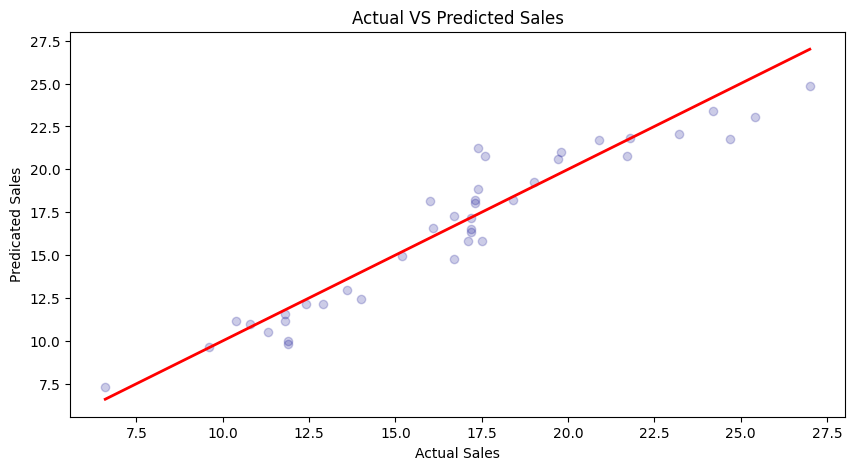

In [106]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test,testing_pred,color='darkblue',alpha=0.2)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color='red',linewidth=2)
plt.title('Actual VS Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicated Sales')
plt.show()

Using RandomForestRegressor

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [108]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()

In [109]:
model.fit(X_train,Y_train)

RandomForestRegressor()

Evaluation of Training data and Testing data for RandomForestRegressor

In [110]:
from sklearn.metrics import mean_squared_error,r2_score
training_pred=model.predict(X_train)
mse_train=mean_squared_error(Y_train,training_pred)
r2_train=r2_score(Y_train,training_pred)
print(f"Mean Squared Error Of Training Data: {mse_train}")
print(f"R^2 Score Of Training Data: {r2_train}")

Mean Squared Error Of Training Data: 0.20968778749999858
R^2 Score Of Training Data: 0.9926797414741334


In [111]:
testing_pred=model.predict(X_test)
mse_test=mean_squared_error(Y_test,testing_pred)
r2_test=r2_score(Y_test,testing_pred)
print(f"Mean Squared Error Of Training Data: {mse_test}")
print(f"R^2 Score Of Testing Data: {r2_test}")

Mean Squared Error Of Training Data: 1.3323436750000008
R^2 Score Of Testing Data: 0.9370703185908473


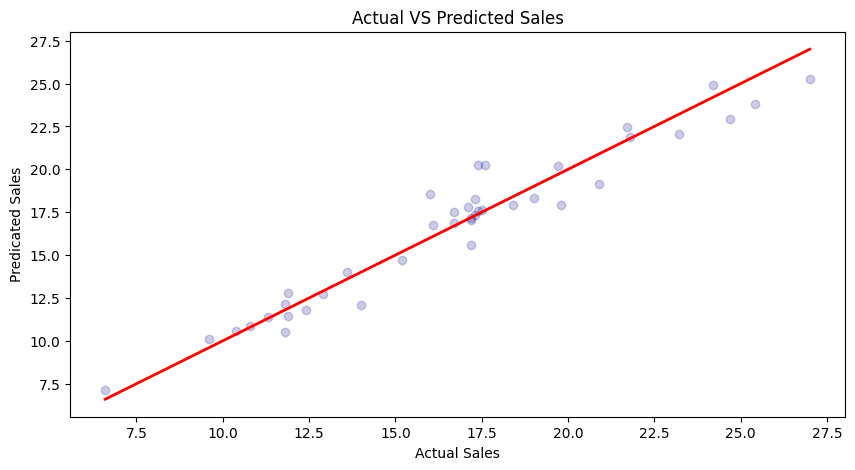

In [112]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test,testing_pred,color='darkblue',alpha=0.2)
plt.plot([Y_test.min(),Y_test.max()],[Y_test.min(),Y_test.max()],color='red',linewidth=2)
plt.title('Actual VS Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicated Sales')
plt.show()